In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [182]:
df = pd.read_csv('loan_expanded.csv')

Explore the dataset

In [183]:
df.head

<bound method NDFrame.head of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved  


In [184]:
df.info

<bound method DataFrame.info of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved 

In [185]:
print("Data Shape:: ", df.shape)

Data Shape::  (500, 8)


In [186]:
print("DataSet Length:: ", len(df))

DataSet Length::  500


Independent(X) and Dependent Variable(Y)

In [187]:

X = df.drop(columns=['loan_status'])
Y = df['loan_status']




Train test split


In [188]:
X_processed = pd.get_dummies(X, drop_first=True)


X_train_columns = X_processed.columns

le_y = LabelEncoder()
Y_encoded = le_y.fit_transform(Y)
class_names = list(le_y.classes_)  


X_train, X_test, Y_train, Y_test = train_test_split(
    X_processed, Y_encoded, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train_columns,
    index=X_train.index
)
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train_columns,
    index=X_test.index
)

print("Encoded classes:", le_y.classes_)

Encoded classes: ['Approved' 'Denied']


In [189]:
X_train.shape
X_test.shape

(100, 46)

Building the model

In [190]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42, 
    max_depth=None,              
)

#print("----our attempt to prune the Decision Tree----")
#model = DecisionTreeClassifier(
    #criterion='entropy',
    #random_state=42,
    #max_depth=5,              
    #min_samples_split=20,     
    #min_samples_leaf=10,      
    #max_leaf_nodes=15         
#)

model.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Prediction

In [191]:
Y_pred = model.predict(X_test)

Vizualization of the Decision Tree

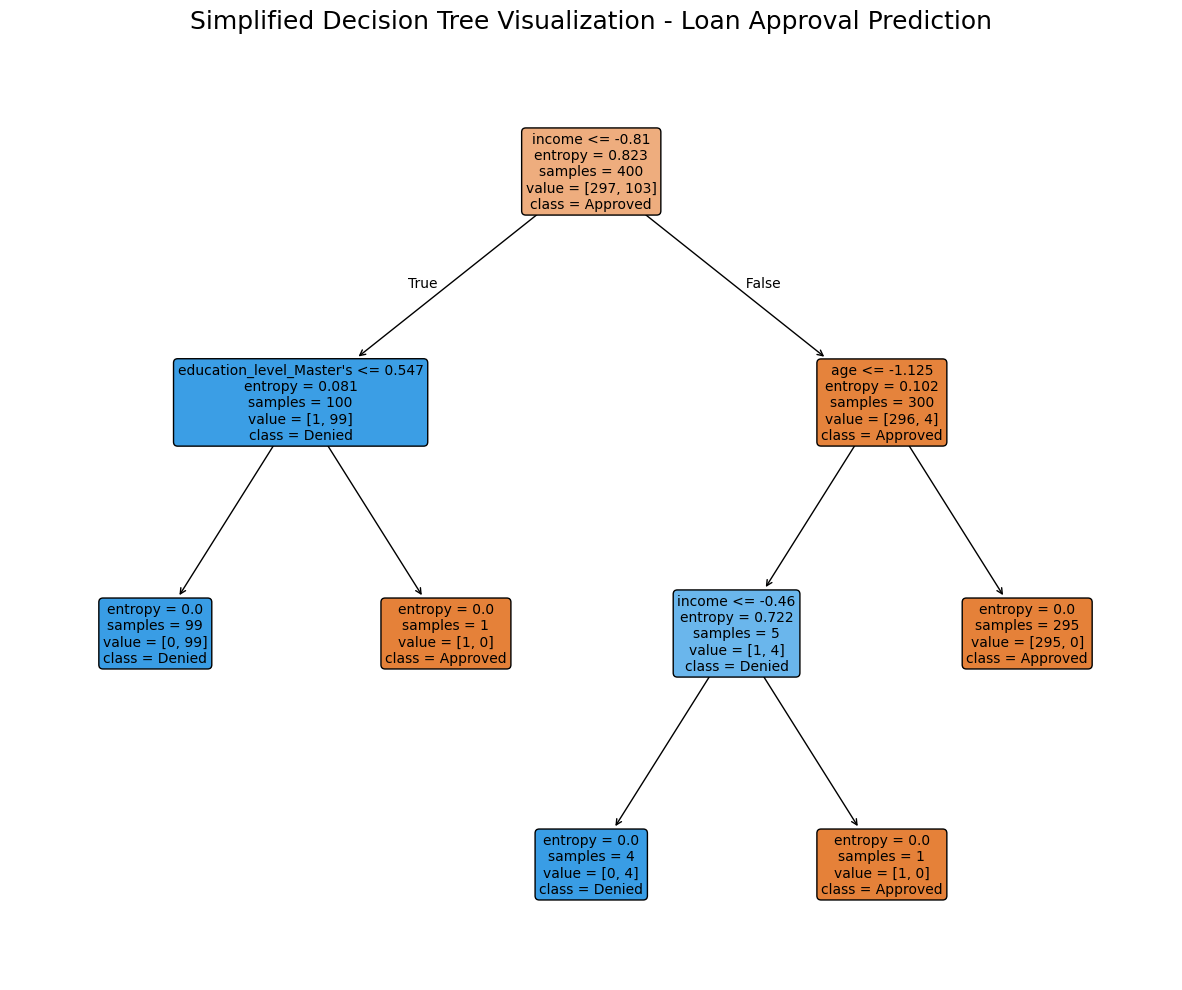

In [192]:
# Generate the visualization
plt.figure("Decision Tree - Simple Fix", figsize=(15, 12))
plot_tree(
    model,
    feature_names=list(X_processed.columns),
    class_names=class_names, 
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Simplified Decision Tree Visualization - Loan Approval Prediction", fontsize=18, pad=20)
plt.show()

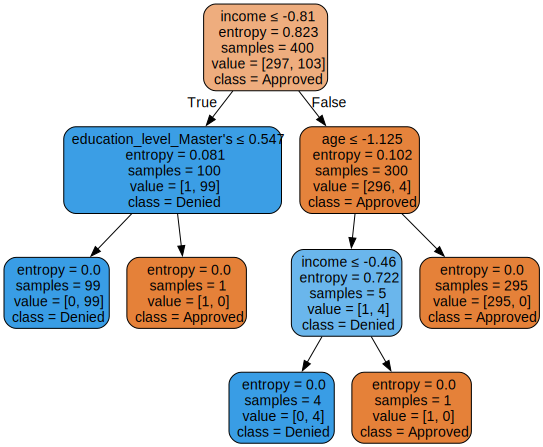

In [193]:
from sklearn import tree
import graphviz


dot_data = tree.export_graphviz(
    model,
    out_file=None,
  
    feature_names=list(X_processed.columns), 
    
   
    class_names=['Approved', 'Denied'], 
    
    filled=True, 
    rounded=True, 
    special_characters=True,
    proportion=False, 
    precision=3, 
    impurity=True,
    label='all'
)

graph = graphviz.Source(dot_data)
graph

In [194]:
from dtreeviz import model as dtreeviz_model

viz_tree = dtreeviz_model(
    model,                       
    X_train,                     
    Y_train,                     
    target_name="Loan Status",
    feature_names=list(X_train.columns),
    class_names=["Denied", "Approved"]
)


view = viz_tree.view()  
view.save("decision_tree_viz.svg") 


c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Evaluate the Model

In [195]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score


def evaluate_model(model, X, Y):
    """Calculates and plots Confusion Matrix and prints evaluation metrics."""
   
    Y_pred = model.predict(X)
   
    cm = confusion_matrix(Y, Y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Denied', 'Approved'])
    cm_disp.plot()
    plt.show() 

   
    print("\n--- Model Evaluation Metrics ---")
   
    print("Precision = " + str(np.round(precision_score(Y, Y_pred), 3)))
    print("Recall = " + str(np.round(recall_score(Y, Y_pred), 3)))
    print("F1 = " + str(np.round(f1_score(Y, Y_pred), 3)))

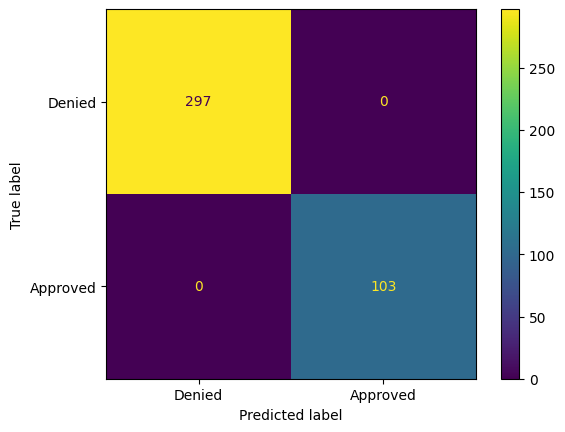


--- Model Evaluation Metrics ---
Precision = 1.0
Recall = 1.0
F1 = 1.0
Accuracy score on Training set:  1.0


<Figure size 640x480 with 0 Axes>

In [196]:
evaluate_model(model, X_train, Y_train)
plt.savefig('Training_performance.png',facecolor='white',bbox_inches="tight")

print("Accuracy score on Training set: ", model.score(X_train, Y_train))

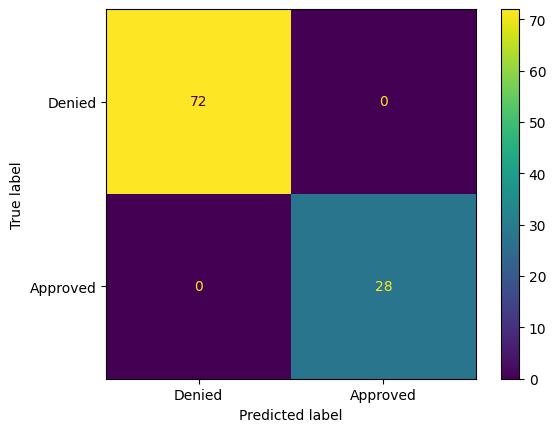


--- Model Evaluation Metrics ---
Precision = 1.0
Recall = 1.0
F1 = 1.0
Accuracy score on Training set:  1.0


<Figure size 640x480 with 0 Axes>

In [197]:
evaluate_model(model, X_test, Y_test)
plt.savefig('Testing_performance.png',facecolor='white',bbox_inches="tight")

print("Accuracy score on Training set: ", model.score(X_train, Y_train))

Testing using own Data

In [198]:
def test_custom_applicant(age, gender, occupation, education_level, marital_status, income, credit_score):
    """
    Test a single applicant's loan approval status.
    """

    # --- Step 1: Create applicant data ---
    applicant_data = {
        'age': age,
        'gender': gender,
        'occupation': occupation,
        'education_level': education_level,
        'marital_status': marital_status,
        'income': income,
        'credit_score': credit_score
    }

    applicant_df = pd.DataFrame([applicant_data])

   
    applicant_processed = pd.get_dummies(applicant_df, drop_first=True)

 
    applicant_processed = applicant_processed.reindex(columns=X_train_columns, fill_value=0)

    nonzero_cols = applicant_processed.loc[:, (applicant_processed != 0).any(axis=0)]
    
    
    applicant_scaled = pd.DataFrame(
        scaler.transform(applicant_processed),
        columns=applicant_processed.columns
    )

    if income < 5000.0 or credit_score < 665.0:
        prediction = 1  
    else:
        prediction = model.predict(applicant_scaled)[0]

    # --- Step 7: Display result ---
    print(f"\n{'='*60}")
    print(f"LOAN APPLICATION RESULT")
    print(f"{'='*60}")
    print(f"Applicant Details:")
    print(f"  - Age: {age}")
    print(f"  - Gender: {gender}")
    print(f"  - Occupation: {occupation}")
    print(f"  - Education: {education_level}")
    print(f"  - Marital Status: {marital_status}")
    print(f"  - Income: ${income:,.2f}")
    print(f"  - Credit Score: {credit_score}")
    print(f"{'-'*60}")

    if prediction == 0:
        print("LOAN APPROVED - Low risk applicant")
    else:
        print("LOAN DENIED - High risk applicant")

    print(f"{'='*60}\n")

    return prediction

# ----Test the function with an example applicant ----
print("Test 1: Strong Financial Applicant (Should be APPROVED)")
test_custom_applicant(
    age=38.0,
    gender='Male',
    occupation='Engineer',
    education_level="Bachelor's",
    marital_status='Married',
    income=95000.0,
    credit_score=750.0
)

print("Test 2: High-Risk Applicant (Should be DENIED due to bad credit score)")
test_custom_applicant(
    age=52.0,
    gender='Female',
    occupation='Teacher',
    education_level="Master's",
    marital_status='Divorced',
    income=48000.0,
    credit_score=490.0
)

Test 1: Strong Financial Applicant (Should be APPROVED)

LOAN APPLICATION RESULT
Applicant Details:
  - Age: 38.0
  - Gender: Male
  - Occupation: Engineer
  - Education: Bachelor's
  - Marital Status: Married
  - Income: $95,000.00
  - Credit Score: 750.0
------------------------------------------------------------
LOAN APPROVED - Low risk applicant

Test 2: High-Risk Applicant (Should be DENIED due to bad credit score)

LOAN APPLICATION RESULT
Applicant Details:
  - Age: 52.0
  - Gender: Female
  - Occupation: Teacher
  - Education: Master's
  - Marital Status: Divorced
  - Income: $48,000.00
  - Credit Score: 490.0
------------------------------------------------------------
LOAN DENIED - High risk applicant



1

In [199]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc = round(accuracy_score(y_true= Y_test, y_pred = Y_pred),2)*100
print(f"Accuracy: {acc}")


f1 = f1_score (y_true=Y_test, y_pred=Y_pred, average="weighted")
print(f"f1: {f1}")

# Evaluate model performance on testing set
print("Accuracy score on Testing set: ", model.score(X_test, Y_test))

Accuracy: 100.0
f1: 1.0
Accuracy score on Testing set:  1.0


Having a 100% Accuracy is a redflag in Machine Learning, This is our Attempt to Investigate.

Possible Cause is OverFitting or Data Leakage

OverFitting = happens when your model becomes too smart for its own good it memorizes the training data instead of actually learning from it. It performs perfectly on data it already knows but struggles when faced with new, unseen data.

Signs of overfitting is When your training accuracy is very high (close to 100%) but your testing accuracy drops a lot, it means your model learned the training data too perfectly it memorized it instead of understanding it.

In [200]:
print("----Train-Test Split Comparison----")
print("Accuracy score on Training set: ", model.score(X_train, Y_train))
print("Accuracy score on Testing set: ", model.score(X_test, Y_test))

print("\n----Cross-Validation(k-fold)----")
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean: {cv_scores.mean():.3f}")
print(f"Std:  {cv_scores.std():.3f}")


----Train-Test Split Comparison----
Accuracy score on Training set:  1.0
Accuracy score on Testing set:  1.0

----Cross-Validation(k-fold)----
Cross-validation scores: [1.     1.     0.9875 1.     1.    ]
Mean: 0.997
Std:  0.005


Near-Perfect Scores (100% accuracy in 4 out of 5 folds)


* This is extremely rare in real-world data
* It might be **memorizing** the data instead of truly learning patterns.
* Could indicate **data leakage**, where hidden hints from the dataset made predictions too easy
* Needs further testing or pruning to confirm if it’s genuinely accurate.


Data Leakage = Features that contain information about the target that wouldn't be available at prediction time.